<a href="https://colab.research.google.com/github/sclaudiobr/geocloud/blob/main/GeoBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOBR e PYPLOT
O GeoBR é um pacote computacional para download de conjuntos de dados espaciais oficiais do Brasil. O pacote inclui uma ampla gama de dados geoespaciais em formato de geopackage (tal como os shapefiles), disponíveis em várias escalas geográficas e por vários anos com atributos harmonizados, projeção e topologia (ver lista detalhada de conjuntos de dados disponíveis neste [link](https://github.com/ipeaGIT/geobr).<p> O Pyplot é uma interface baseada em estado para matplotlib.pyplot. Fornecendo uma forma de plotagem semelhante ao MATLAB. Destina-se principalmente a plotagens interativas e casos simples. [+...](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).


# 1 - GeobrPyplot01 - Gerando o primeiro mapa.

1.   Instalar a biblioteca Geobr. -> [1:06m](https://youtu.be/ZTC-edRVMTo?t=66)
2.   Explorar os dados disponíveis. ->[1:48](https://youtu.be/ZTC-edRVMTo?t=108)
3.   Filtrar região de interesse. ->[2:18](https://youtu.be/ZTC-edRVMTo?t=138)
4.   Gerar o primeiro mapa. -> [4:05](https://youtu.be/ZTC-edRVMTo?t=245)
5.   Adicionar ccategorias e legenda. ->[5:00](https://youtu.be/ZTC-edRVMTo?t=307)

In [ ]:
# GeobrPyplot01 - Geoprocessamento com Geobr e Pyplot.
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/ZTC-edRVMTo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

In [ ]:
# Instalação da biblioteca GeoBR
!pip install geobr

In [ ]:
# Importação da biblioteca
import geobr as gbr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# listagem dos dados disponíveis na base GeoBR
gbr.list_geobr()

In [ ]:
# filtrr os dados de interesse
regiao = gbr.read_region()

In [ ]:
# consultar o formato dos dados
regiao.shape

(5, 3)

In [ ]:
# visualizar a tabela do arquivo (somente os 5 primeiros)
regiao.head(5)

,code_region,name_region,geometry
0,1.0,Norte,"MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ..."
1,2.0,Nordeste,"MULTIPOLYGON (((-38.65134 -17.94651, -38.65296..."
2,3.0,Sudeste,"MULTIPOLYGON (((-29.30279 -20.51580, -29.30540..."
3,4.0,Sul,"MULTIPOLYGON (((-48.46837 -27.70455, -48.46768..."
4,5.0,Centro Oeste,"MULTIPOLYGON (((-50.51107 -12.86077, -50.50895..."


In [ ]:
# consultar as colunas de dados
regiao.columns

Index(['code_region', 'name_region', 'geometry'], dtype='object')

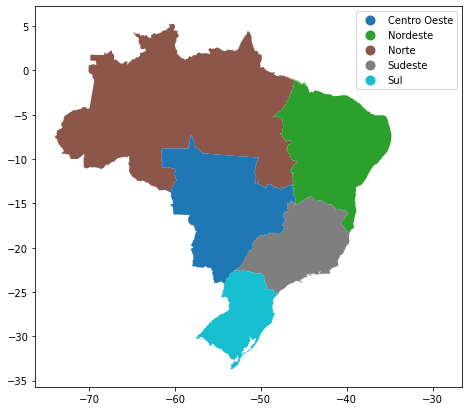

In [ ]:
# plotar do mapa
regiao.plot(column='name_region',figsize=(12,7), legend='true')

# 2 - GeobrPyplot02 - Trabalhando com camadas de dados

1.   Filtrar dados por atributos. ->[1:20](https://youtu.be/g5xof3HQnRM?t=80)
2.   Plotar sobreposição de camadas. -> [2:18](https://youtu.be/g5xof3HQnRM?t=138)
3.   Gerar arquivos  ESRI_shapefile -> [7:28](https://youtu.be/g5xof3HQnRM?t=448)
3.   Compactar e Exportar. --> [8:50](https://youtu.be/g5xof3HQnRM?t=529)



In [ ]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/g5xof3HQnRM?start=529" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

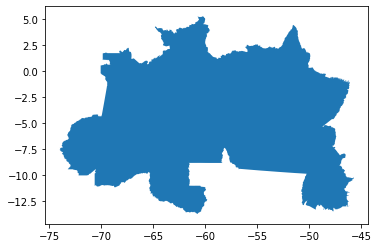

In [ ]:
# 1 - Filtrar por atributos
norte = regiao[regiao.name_region=='Norte']
norte.plot()

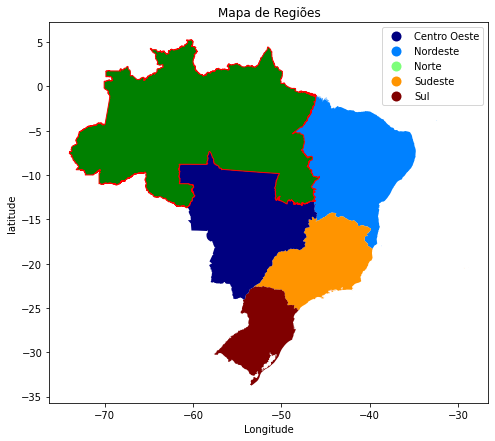

In [ ]:
# 2 Plotar com sobreposição de camadas 
# figura objeto ( foi adicionado o parametro "cmap" para variar as cores)
base = regiao.plot(column='name_region',figsize=(12,7), legend='true', cmap='jet')
norte.plot(ax=base, edgecolor='red', color='g')
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.title('Mapa de Regiões')
plt.savefig('regioes.png',dpi=90)
plt.show()


In [ ]:
# criar a pasta arquivos
!mkdir arquivos

In [ ]:
# criar os arquivos shapefile e os guarda na pasta "arquivos"
regiao.to_file('./arquivos/regioes.shp',driver='ESRI Shapefile')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [ ]:
# compactar os arquivos dentro da pasta de saida
!zip -r arquivos_saida.zip arquivos

  adding: arquivos/ (stored 0%)
  adding: arquivos/regioes.shp (deflated 15%)
  adding: arquivos/regioes.shx (deflated 36%)
  adding: arquivos/regioes.prj (deflated 17%)
  adding: arquivos/regioes.dbf (deflated 84%)
  adding: arquivos/regioes.cpg (stored 0%)
